<a href="https://colab.research.google.com/github/schoudh96/MLAssetMang_DePrado/blob/main/Ch7DePrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
from scipy.linalg import block_diag

def formBlockMatrix(nblocks, bsize, bcorr):
  block = np.ones([bsize, bsize])*bcorr
  block[range(bsize), range(bsize)] = 1
  corr = block_diag(*([block]*nblocks))
  return corr



In [14]:
corr0 = formBlockMatrix(2,2,0.5)
eval, evec = np.linalg.eigh(corr0)
print(max(eval)/min(eval))

3.0


<Axes: >

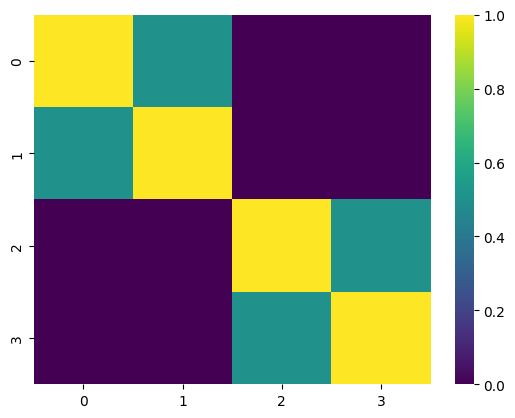

In [15]:
sns.heatmap(corr0, cmap = 'viridis')

In [16]:
corr02 = block_diag(formBlockMatrix(1,2,0.5))
corr12 = formBlockMatrix(1,2,0)
corr1 = block_diag(corr02, corr12)
eval, evec = np.linalg.eigh(corr1)
cond = eval.max()/eval.min()
print(cond)

3.0


In [17]:
eval, evec

(array([0.5, 1. , 1. , 1.5]),
 array([[-0.70710678,  0.        ,  0.        ,  0.70710678],
        [ 0.70710678,  0.        ,  0.        ,  0.70710678],
        [ 0.        ,  1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ]]))

<Axes: >

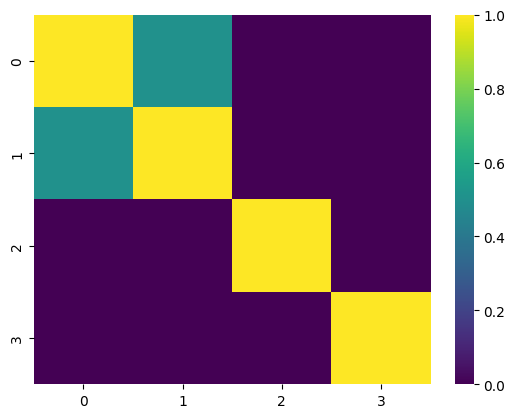

In [18]:
sns.heatmap(corr1, cmap = 'viridis')

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

def clusterKMeansBase(corr, maxNumClusters = None, n_init = 10):
  x, silh = ((1 - corr.fillna(0))/2)**0.5, pd.Series()
  for init in range(n_init):
    for i in range(2, maxNumClusters+1):
      kmeans = KMeans(n_clusters = i, n_jobs = 1, n_init = 1)
      kmeans = kmeans.fit(x)
      silh_ = silhouette_samples(x, kmeans.labels_)
      stat = (silh_.mean()/silh_.std(), silh.mean()/silh.std())
      if np.isnan(stat[1]) or stat[0] >stat[1]:
        silh, kmeans = silh_, kmeans

  newIdx = np.argsort(kmeans.labels_)
  corr1 = corr.iloc[newIdx]

  corr1 = corr1.iloc[:, newIdx]
  clstars = {i:corr.columns[np.where(kmeans.labels_ == i)[0]].tolist()\
             for i in np.unique(kmeans.labels_)}
  silh = pd.Series(silh, index = x.index)
  return corr1, clstars, silh

In [22]:
corr2, clstrs, silh = clusterKMeansBase(corr0, corr0[0]/2, 10)
clstrs

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'